In [1]:
#libraries
import pandas as pd
#import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
print("libs downloaded")

libs downloaded


In [2]:
#define path
file_path = "C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/medical_clean.csv"
df = pd.read_csv(file_path)
#check out data types and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
#drop unnecessary columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'], axis=1)

In [4]:
# View the unique values in each column
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in 'City':
['Eva' 'Marianna' 'Sioux Falls' ... 'Milmay' 'Quinn' 'Coraopolis']


Unique values in 'State':
['AL' 'FL' 'SD' 'MN' 'VA' 'OK' 'OH' 'MS' 'WI' 'IA' 'CA' 'IN' 'MO' 'MI'
 'NE' 'PA' 'AR' 'WV' 'KS' 'MA' 'KY' 'NY' 'VT' 'DC' 'IL' 'ND' 'SC' 'AK'
 'NM' 'NH' 'GA' 'NC' 'MD' 'TN' 'WA' 'TX' 'CO' 'NJ' 'LA' 'OR' 'AZ' 'ME'
 'ID' 'UT' 'RI' 'MT' 'PR' 'NV' 'CT' 'HI' 'WY' 'DE']


Unique values in 'County':
['Morgan' 'Jackson' 'Minnehaha' ... 'Navarro' 'Los Alamos' 'Sterling']


Unique values in 'Zip':
[35621 32446 57110 ...  8340 57775 15108]


Unique values in 'Lat':
[34.3496  30.84513 43.54321 ... 39.43609 44.10354 40.49998]


Unique values in 'Lng':
[ -86.72508  -85.22907  -96.63772 ...  -74.87302 -102.0159   -80.19959]


Unique values in 'Population':
[ 2951 11303 17125 ...  8368  7908 41524]


Unique values in 'Area':
['Suburban' 'Urban' 'Rural']


Unique values in 'TimeZone':
['America/Chicago' 'America/New_York' 'America/Los_Angeles'
 'America/Indiana/Indianapolis' 'America/

In [5]:
#clean job's to all be the same case
df['Job'] = df['Job'].str.lower()
print(df['Job'].unique())

['psychologist, sport and exercise' 'community development worker'
 'chief executive officer' 'early years teacher'
 'health promotion specialist' 'corporate treasurer' 'hydrologist'
 'psychiatric nurse' 'computer games developer'
 'production assistant, radio' 'contractor'
 'surveyor, planning and development'
 'english as a second language teacher' 'actuary' 'media planner'
 'fast food restaurant manager' 'horticulturist, commercial'
 'secretary, company' 'designer, graphic' 'personnel officer'
 'telecommunications researcher' 'restaurant manager, fast food'
 'surveyor, minerals' 'architectural technologist'
 'therapist, speech and language' 'accounting technician'
 'glass blower/designer' 'travel agency manager' 'illustrator'
 'police officer' 'accountant, chartered public finance'
 'sport and exercise psychologist' 'pensions consultant'
 'community education officer' 'radio producer'
 'designer, television/film set' 'conference centre manager'
 'advertising account executive' 'civi

In [6]:
#strip white space before an after
df['Job'] = df['Job'].str.strip()
print(df['Job'].unique())

['psychologist, sport and exercise' 'community development worker'
 'chief executive officer' 'early years teacher'
 'health promotion specialist' 'corporate treasurer' 'hydrologist'
 'psychiatric nurse' 'computer games developer'
 'production assistant, radio' 'contractor'
 'surveyor, planning and development'
 'english as a second language teacher' 'actuary' 'media planner'
 'fast food restaurant manager' 'horticulturist, commercial'
 'secretary, company' 'designer, graphic' 'personnel officer'
 'telecommunications researcher' 'restaurant manager, fast food'
 'surveyor, minerals' 'architectural technologist'
 'therapist, speech and language' 'accounting technician'
 'glass blower/designer' 'travel agency manager' 'illustrator'
 'police officer' 'accountant, chartered public finance'
 'sport and exercise psychologist' 'pensions consultant'
 'community education officer' 'radio producer'
 'designer, television/film set' 'conference centre manager'
 'advertising account executive' 'civi

In [7]:
#remove charaacters as they may lead to data inconsistencies
df['Job'] = df['Job'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Removes non-alphabet characters
print(df['Job'].unique())

['psychologist sport and exercise' 'community development worker'
 'chief executive officer' 'early years teacher'
 'health promotion specialist' 'corporate treasurer' 'hydrologist'
 'psychiatric nurse' 'computer games developer'
 'production assistant radio' 'contractor'
 'surveyor planning and development'
 'english as a second language teacher' 'actuary' 'media planner'
 'fast food restaurant manager' 'horticulturist commercial'
 'secretary company' 'designer graphic' 'personnel officer'
 'telecommunications researcher' 'restaurant manager fast food'
 'surveyor minerals' 'architectural technologist'
 'therapist speech and language' 'accounting technician'
 'glass blowerdesigner' 'travel agency manager' 'illustrator'
 'police officer' 'accountant chartered public finance'
 'sport and exercise psychologist' 'pensions consultant'
 'community education officer' 'radio producer'
 'designer televisionfilm set' 'conference centre manager'
 'advertising account executive' 'civil service fas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                10000 non-null  object 
 1   State               10000 non-null  object 
 2   County              10000 non-null  object 
 3   Zip                 10000 non-null  int64  
 4   Lat                 10000 non-null  float64
 5   Lng                 10000 non-null  float64
 6   Population          10000 non-null  int64  
 7   Area                10000 non-null  object 
 8   TimeZone            10000 non-null  object 
 9   Job                 10000 non-null  object 
 10  Children            10000 non-null  int64  
 11  Age                 10000 non-null  int64  
 12  Income              10000 non-null  float64
 13  Marital             10000 non-null  object 
 14  Gender              10000 non-null  object 
 15  ReAdmis             10000 non-null  object 
 16  VitD_

In [9]:
#THE IMPORTANCE OF THIS ANALYSIS IS TO UNDERSTAND THE PERSONAL FACTORS THAT IMPACT READMITS THE MOST
#WHILE FINANCIAL DATA IS INDIRECTLY TIED, IT IS NOT DIRECTLY TIED.
#I WILL GET RID OF THIS FINANCIAL DATA
#ALSO SOME OF THE LOCATION DATA IS REPETITIVE
#columns to drop
columns_to_drop = ['Zip', 'County', 'State', 'City', 'Lat', 'Lng', 'TimeZone', 'TotalCharge', 'Additional_charges']
df = df.drop(columns=columns_to_drop)
print(df.columns)

Index(['Population', 'Area', 'Job', 'Children', 'Age', 'Income', 'Marital',
       'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
       'vitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'Item1',
       'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [10]:
#Encoding Intial_admin and Compliance by the same scale 0f 1 being the highest and bigger numbers being less important
#ordinal encoding manually for consistency.
#encode Initial_admin
initial_admin_mapping = {
    'Emergency Admission': 1,
    'Observation Admission': 2,
    'Elective Admission': 3
}
df['Initial_admin'] = df['Initial_admin'].map(initial_admin_mapping)

#encoded Compliance
complication_mapping = {
    'High': 1,
    'Medium': 2,
    'Low': 3
}
df['Complication_risk'] = df['Complication_risk'].map(complication_mapping)
print("ordinal encoding complete! 1 is highest of importance")

ordinal encoding complete! 1 is highest of importance


In [11]:
#binary encoding fr yes and no
binary_features = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'ReAdmis', 
                   'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Soft_drink']
for feature in binary_features:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
#using it as a boolean as deprecation of .replace with change in the future.
print("binaries encoded")

binaries encoded


In [12]:
#One Hot Encoding for the nominal variables
df = pd.get_dummies(df, columns=['Gender', 'Marital', 'Job', 'Area', 'Services'], drop_first=False)
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 686 entries, Population to Services_MRI
dtypes: bool(654), float64(3), int32(13), int64(16)
memory usage: 8.2 MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 686 entries, Population to Services_MRI
dtypes: bool(654), float64(3), int32(13), int64(16)
memory usage: 8.2 MB


In [14]:
#check all variables
pd.set_option('display.max_columns', None)
df.head()

,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Gender_Female,Gender_Male,Gender_Nonbinary,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Job_academic librarian,Job_accommodation manager,Job_accountant chartered,Job_accountant chartered certified,Job_accountant chartered management,Job_accountant chartered public finance,Job_accounting technician,Job_actor,Job_actuary,Job_acupuncturist,Job_administrator,Job_administrator arts,Job_administrator charitiesvoluntary organisations,Job_administrator civil service,Job_administrator education,Job_administrator local government,Job_administrator sports,Job_adult guidance worker,Job_adult nurse,Job_advertising account executive,Job_advertising account planner,Job_advertising art director,Job_advertising copywriter,Job_advice worker,Job_aeronautical engineer,Job_agricultural consultant,Job_agricultural engineer,Job_aid worker,Job_air broker,Job_air cabin crew,Job_air traffic controller,Job_airline pilot,Job_ambulance person,Job_amenity horticulturist,Job_analytical chemist,Job_animal nutritionist,Job_animal technologist,Job_animator,Job_applications developer,Job_arboriculturist,Job_archaeologist,Job_architect,Job_architectural technologist,Job_archivist,Job_armed forces logisticssupportadministrative officer,Job_armed forces operational officer,Job_armed forces technical officer,Job_armed forces training and education officer,Job_art gallery manager,Job_art therapist,Job_artist,Job_arts administrator,Job_arts development officer,Job_associate professor,Job_astronomer,Job_audiological scientist,Job_automotive engineer,Job_banker,Job_barista,Job_barrister,Job_barristers clerk,Job_best boy,Job_biochemist clinical,Job_biomedical engineer,Job_biomedical scientist,Job_bonds trader,Job_bookseller,Job_brewing technologist,Job_broadcast engineer,Job_broadcast journalist,Job_broadcast presenter,Job_building control surveyor,Job_building services engineer,Job_building surveyor,Job_buyer industrial,Job_buyer retail,Job_cabin crew,Job_call centre manager,Job_camera operator,Job_careers adviser,Job_careers information officer,Job_cartographer,Job_catering manager,Job_ceramics designer,Job_charity fundraiser,Job_charity officer,Job_chartered accountant,Job_chartered certified accountant,Job_chartered legal executive england and wales,Job_chartered loss adjuster,Job_chartered management accountant,Job_chartered public finance accountant,Job_chemical engineer,Job_chemist analytical,Job_chief executive officer,Job_chief financial officer,Job_chief marketing officer,Job_chief of staff,Job_chief operating officer,Job_chief strategy officer,Job_chief technology officer,Job_child psychotherapist,Job_chiropodist,Job_chiropractor,Job_civil engineer consulting,Job_civil engineer contracting,Job_civil service administrator,Job_civil service fast streamer,Job_claims inspectorassessor,Job_clinical biochemist,Job_clinical cytogeneticist,Job_clinical embryologist,Job_clinical molecular geneticist,Job_clinical psychologist,Job_clinical research associate,Job_clinical scientist histocompatibility and immunogenetics,Job_clothingtextile technologist,Job_colour technologist,Job_commercial art gallery manager,Job_commercial horticulturist,Job_commercialresidential surveyor,Job_commissioning editor,Job_communications engineer,Job_community arts worker,Job_community development worker,Job_community education officer,Job_community pharmacist,Job_company secretary,Job_comptroller,Job_computer games developer,Job_conference centre manager,Job_conservation officer historic buildings,Job_conservation officer nature,Job_conservator furniture,Job_conservator museumgallery,Job_consulting civil engineer,Job_contracting civil en

In [15]:
#True and Flase needs to be encoded
df = df.map(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Gender_Female,Gender_Male,Gender_Nonbinary,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Job_academic librarian,Job_accommodation manager,Job_accountant chartered,Job_accountant chartered certified,Job_accountant chartered management,Job_accountant chartered public finance,Job_accounting technician,Job_actor,Job_actuary,Job_acupuncturist,Job_administrator,Job_administrator arts,Job_administrator charitiesvoluntary organisations,Job_administrator civil service,Job_administrator education,Job_administrator local government,Job_administrator sports,Job_adult guidance worker,Job_adult nurse,Job_advertising account executive,Job_advertising account planner,Job_advertising art director,Job_advertising copywriter,Job_advice worker,Job_aeronautical engineer,Job_agricultural consultant,Job_agricultural engineer,Job_aid worker,Job_air broker,Job_air cabin crew,Job_air traffic controller,Job_airline pilot,Job_ambulance person,Job_amenity horticulturist,Job_analytical chemist,Job_animal nutritionist,Job_animal technologist,Job_animator,Job_applications developer,Job_arboriculturist,Job_archaeologist,Job_architect,Job_architectural technologist,Job_archivist,Job_armed forces logisticssupportadministrative officer,Job_armed forces operational officer,Job_armed forces technical officer,Job_armed forces training and education officer,Job_art gallery manager,Job_art therapist,Job_artist,Job_arts administrator,Job_arts development officer,Job_associate professor,Job_astronomer,Job_audiological scientist,Job_automotive engineer,Job_banker,Job_barista,Job_barrister,Job_barristers clerk,Job_best boy,Job_biochemist clinical,Job_biomedical engineer,Job_biomedical scientist,Job_bonds trader,Job_bookseller,Job_brewing technologist,Job_broadcast engineer,Job_broadcast journalist,Job_broadcast presenter,Job_building control surveyor,Job_building services engineer,Job_building surveyor,Job_buyer industrial,Job_buyer retail,Job_cabin crew,Job_call centre manager,Job_camera operator,Job_careers adviser,Job_careers information officer,Job_cartographer,Job_catering manager,Job_ceramics designer,Job_charity fundraiser,Job_charity officer,Job_chartered accountant,Job_chartered certified accountant,Job_chartered legal executive england and wales,Job_chartered loss adjuster,Job_chartered management accountant,Job_chartered public finance accountant,Job_chemical engineer,Job_chemist analytical,Job_chief executive officer,Job_chief financial officer,Job_chief marketing officer,Job_chief of staff,Job_chief operating officer,Job_chief strategy officer,Job_chief technology officer,Job_child psychotherapist,Job_chiropodist,Job_chiropractor,Job_civil engineer consulting,Job_civil engineer contracting,Job_civil service administrator,Job_civil service fast streamer,Job_claims inspectorassessor,Job_clinical biochemist,Job_clinical cytogeneticist,Job_clinical embryologist,Job_clinical molecular geneticist,Job_clinical psychologist,Job_clinical research associate,Job_clinical scientist histocompatibility and immunogenetics,Job_clothingtextile technologist,Job_colour technologist,Job_commercial art gallery manager,Job_commercial horticulturist,Job_commercialresidential surveyor,Job_commissioning editor,Job_communications engineer,Job_community arts worker,Job_community development worker,Job_community education officer,Job_community pharmacist,Job_company secretary,Job_comptroller,Job_computer games developer,Job_conference centre manager,Job_conservation officer historic buildings,Job_conservation officer nature,Job_conservator furniture,Job_conservator museumgallery,Job_consulting civil engineer,Job_contracting civil en

In [16]:
#ensure everything is numeric format for the proper modeling
numeric_columns = df.select_dtypes(include=['number'])
if len(numeric_columns.columns) == len(df.columns):
    print("All columns are numeric.")
else:
    print("Not all columns are numeric.")

All columns are numeric.


In [17]:
df.to_csv("C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/Msmit_cleaned_dataset.csv", index=False)
print('complete')

complete


In [18]:
#split
X = df.drop(columns=['ReAdmis'])
y = df['ReAdmis']

#70%/30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the training dataset into training and validation datasets
# 80% training, 20% validation (from the 70% training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("split!")

split!


In [19]:
# Save the training, validation, and test data
X_train.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/X_train.csv', index=False)
X_val.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/X_val.csv', index=False)
X_test.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/X_test.csv', index=False)

y_train.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/y_train.csv', index=False)
y_val.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/y_val.csv', index=False)
y_test.to_csv('C:/Users/tyler/OneDrive - SNHU/WGU/Machine Learning/Task1/y_test.csv', index=False)
print("saved")

saved


Accuracy: 0.9830
Precision: 0.9774
Recall: 0.9747
F1 Score: 0.9760
AUC-ROC: 0.9988

Confusion Matrix:
[[1910   24]
 [  27 1039]]


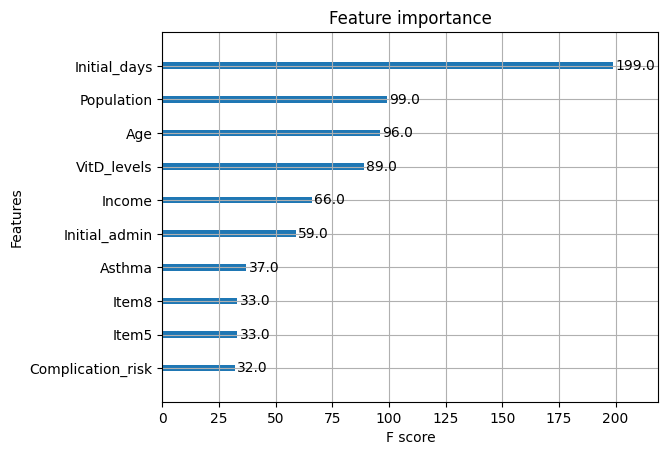

In [20]:
#initialize XGBoost model
model_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

#train the model
model_xgb.fit(X_train, y_train)

#predict on the test set
y_pred = model_xgb.predict(X_test)

#calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

#plot feature importance (using XGBoost's built-in method)
xgb.plot_importance(model_xgb, importance_type='weight', max_num_features=10)
plt.show()

In [21]:
#define XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='mlogloss')

#define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [1]
}

# Setup RandomizedSearchCV (use n_iter to limit the number of random samples)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, scoring='accuracy', cv=5, verbose=3, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV to the validation data
random_search.fit(X_val, y_val)

# Get the best parameters
best_params = random_search.best_params_

# Print the best parameters
print("Best Hyperparameters found through RandomizedSearchCV:")
print(best_params)

# Get the best model
best_model = random_search.best_estimator_

# Predict on the validation set using the best model
y_pred = best_model.predict(X_val)

#evaluation metrics for the optimized model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1])

print("\nOptimized Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

#confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters found through RandomizedSearchCV:
{'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1}

Optimized Model Evaluation Metrics:
Accuracy: 0.9979
Precision: 0.9961
Recall: 0.9981
F1 Score: 0.9971
AUC-ROC: 0.9999

Confusion Matrix:
[[885   2]
 [  1 512]]


In [22]:
#model best hyperparameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1
)

#k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.97857143 0.98035714 0.98214286 0.98214286 0.98303571]
Mean cross-validation accuracy: 0.98125


Accuracy: 0.9813
Precision: 0.9746
Recall: 0.9728
F1 Score: 0.9737
AUC-ROC: 0.9987

Confusion Matrix:
[[1907   27]
 [  29 1037]]


<Figure size 600x400 with 0 Axes>

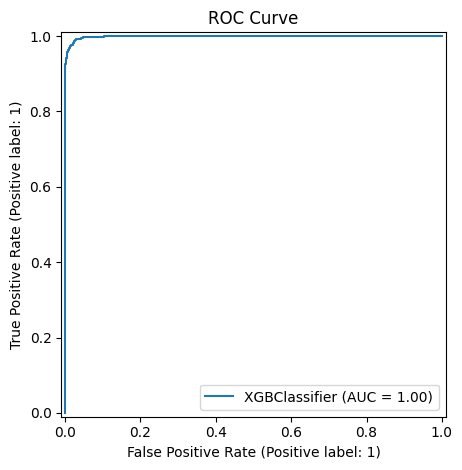

In [23]:
#best model to make predictions on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

#evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

#ROC Curve
plt.figure(figsize=(6, 4))
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.tight_layout()

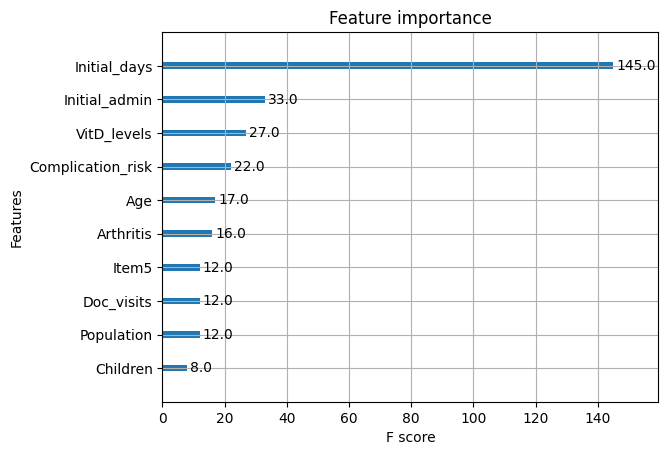

In [24]:
#feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.show()